In [1]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy import stats
#For some Statistics
from scipy.stats import norm, skew
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as sp

In [2]:
def load_csv():
    return pd.read_csv('/Users/acko068/Desktop/bank-additional/bank-additional-full.csv', sep=';')

In [35]:
def get_train_test(df, test_size=0.2):
    y = df.y
    X = df.drop('y', axis=1)
    return train_test_split(X, y, test_size=test_size, random_state=9)

def split_features(df):
    numeric_feature = [a for a in range(len(df.dtypes)) if df.dtypes[a] in ['int8','int64','float64']]
    return df.columns.difference(df.columns[numeric_feature]), df.columns[numeric_feature]

def label_encode(column_list, df):
    le = LabelEncoder()
    for col in column_list:
        df[col] = le.fit_transform(df[col])

In [6]:
df = load_csv()
df.head()
df.y.replace(('yes','no'),(1,0), inplace=True)

In [7]:
X_train, X_test, y_train, y_test = get_train_test(df, 0.1)

In [8]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_train, y_train, test_size=0.1, random_state=9)

In [10]:
categorical_features, numeric_features = split_features(X_train_2)

In [11]:
categorical_features

Index([u'contact', u'day_of_week', u'default', u'education', u'housing',
       u'job', u'loan', u'marital', u'month', u'poutcome'],
      dtype='object')

In [12]:
X_train_2["contact"].describe()

count        33362
unique           2
top       cellular
freq         21227
Name: contact, dtype: object

In [14]:
X_train_2["contact"].value_counts()

cellular     21227
telephone    12135
Name: contact, dtype: int64

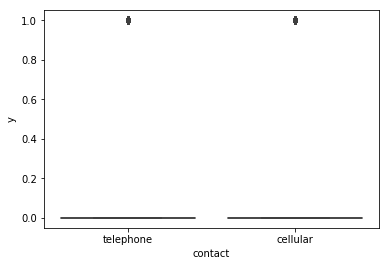

In [18]:
X_train_2_combined = pd.concat([X_train_2, y_train_2], axis=1)
sns.boxplot(x='contact', y='y', data=X_train_2_combined)

In [19]:
pd.crosstab(X_train_2_combined["contact"],X_train_2_combined["y"] )

y,0,1
contact,,
cellular,18081,3146
telephone,11496,639


In [20]:
def change_contact(df):
    df["has_cell"] = np.where(df["contact"]=="telephone",0,1)
    df.drop("contact", axis=1, inplace=True)

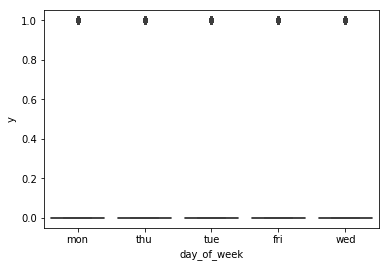

In [21]:
sns.boxplot(x='day_of_week', y='y', data=X_train_2_combined)

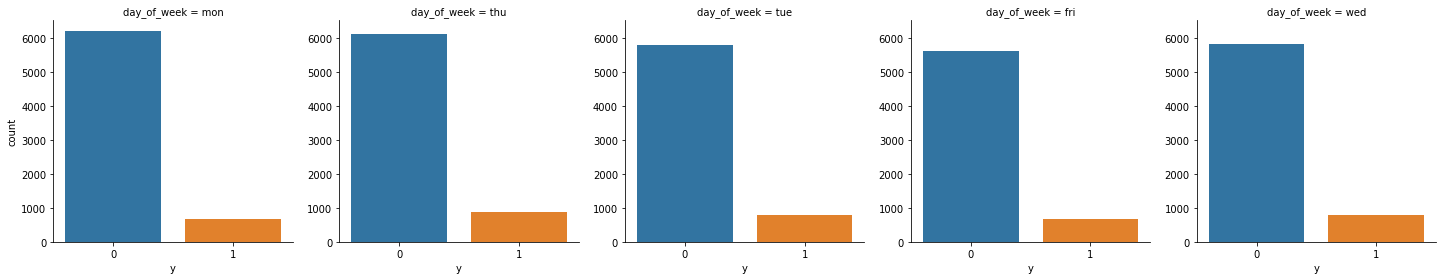

In [23]:
sns.factorplot(x='y', col='day_of_week', kind='count', data=X_train_2_combined);

In [24]:
def change_day_of_week(df):
     df.drop("day_of_week", axis=1, inplace=True)

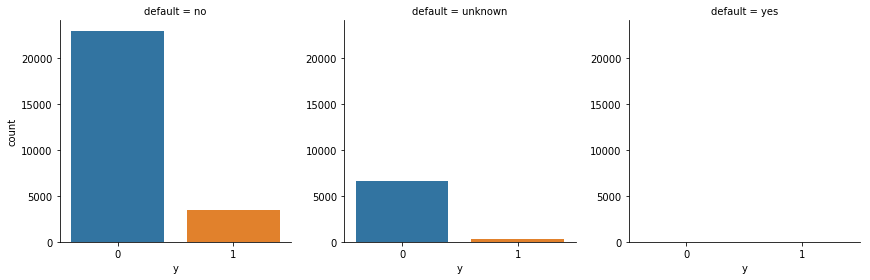

In [26]:
sns.factorplot(x='y', col='default', kind='count', data=X_train_2_combined);

In [29]:
def impute_unknowns(df, column):
    col_values = df[column].values
    df[column] = np.where(col_values=='unknown', df[column].mode(), col_values)

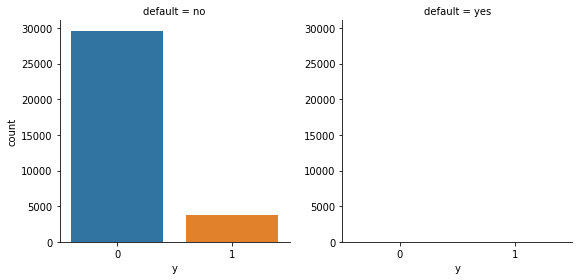

In [32]:
sns.factorplot(x='y', col='default', kind='count', data=X_train_2_combined);

In [33]:
def change_default(df):
    df["has_default"] = np.where(df["default"]=="yes",0,1)
    df.drop("default", axis=1, inplace=True)

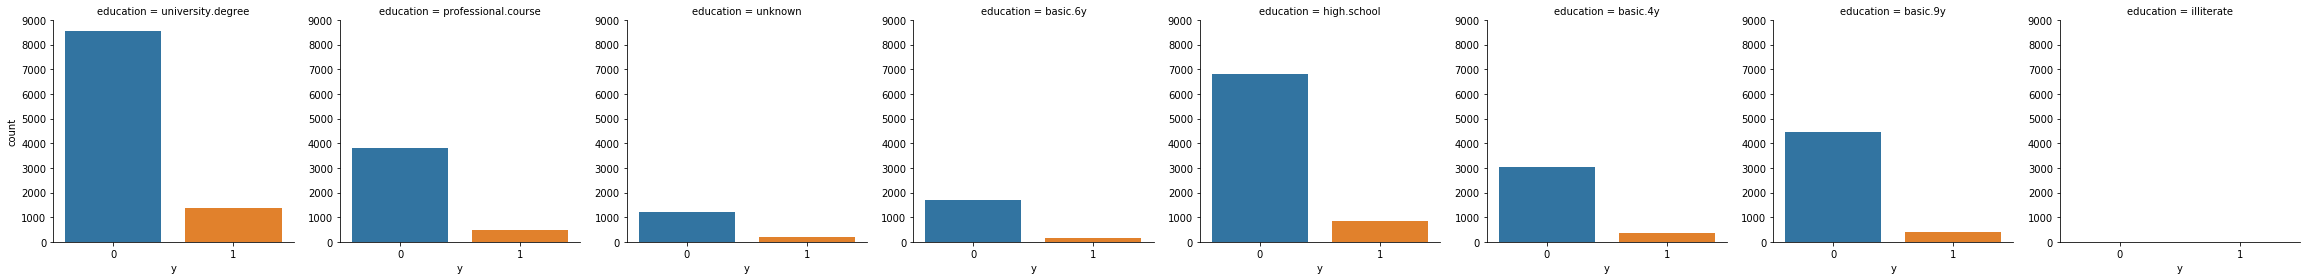

In [34]:
sns.factorplot(x='y', col='education', kind='count', data=X_train_2_combined);

In [36]:
def change_education(df):
    impute_unknowns(df, "education")
    label_encode(["education"],df)

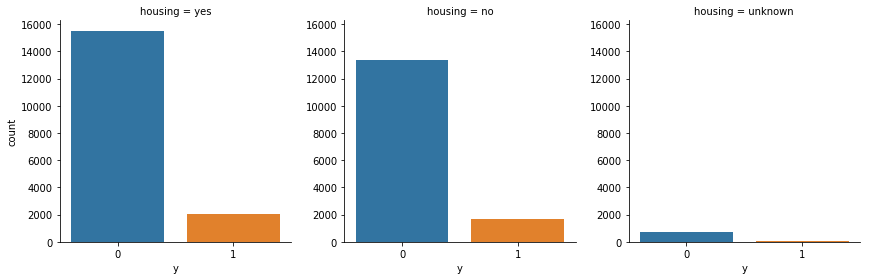

In [38]:
sns.factorplot(x='y', col='housing', kind='count', data=X_train_2_combined);

In [39]:
def change_housing(df):
    impute_unknowns(df, "housing")
    df["has_housing_loan"] = np.where(df["housing"]=="yes",1,0)
    df.drop("housing", axis=1, inplace=True)
    

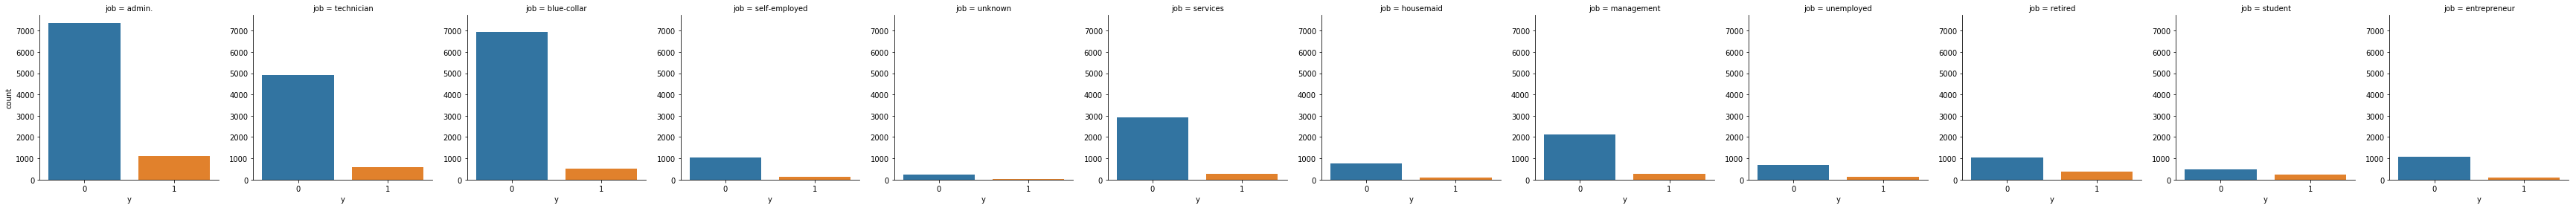

In [40]:
sns.factorplot(x='y', col='job', kind='count', data=X_train_2_combined);

In [42]:
def change_job(df):
    impute_unknowns(df, "job")
    label_encode(["job"],df)
    

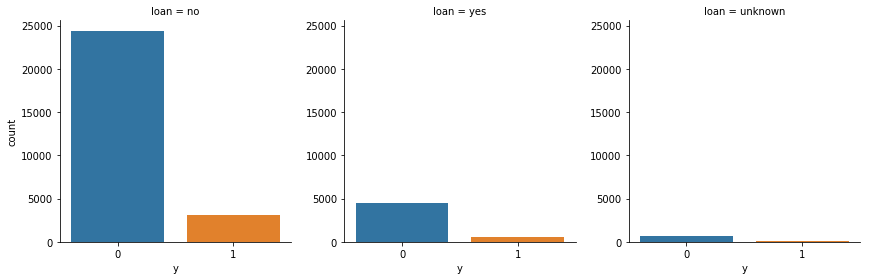

In [43]:
sns.factorplot(x='y', col='loan', kind='count', data=X_train_2_combined);


In [44]:
def change_loan(df):
    impute_unknowns(df, "loan")
    df["has_loan"] = np.where(df["loan"]=="yes",1,0)
    df.drop("loan", axis=1, inplace=True)
    

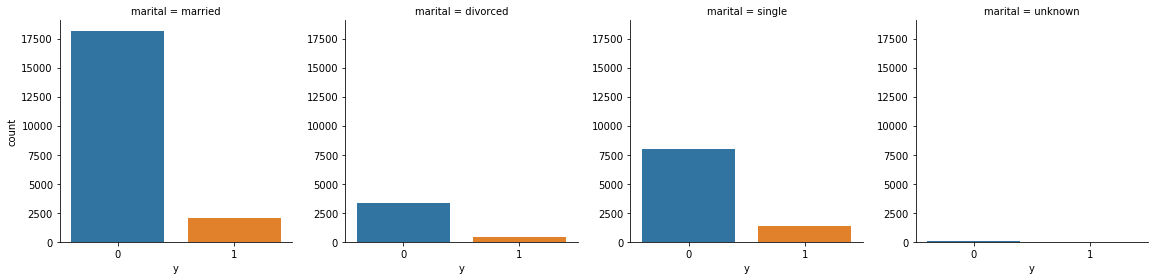

In [45]:
sns.factorplot(x='y', col='marital', kind='count', data=X_train_2_combined);

In [47]:
def change_married(df):
    impute_unknowns(df, "marital")
    label_encode(["marital"],df)

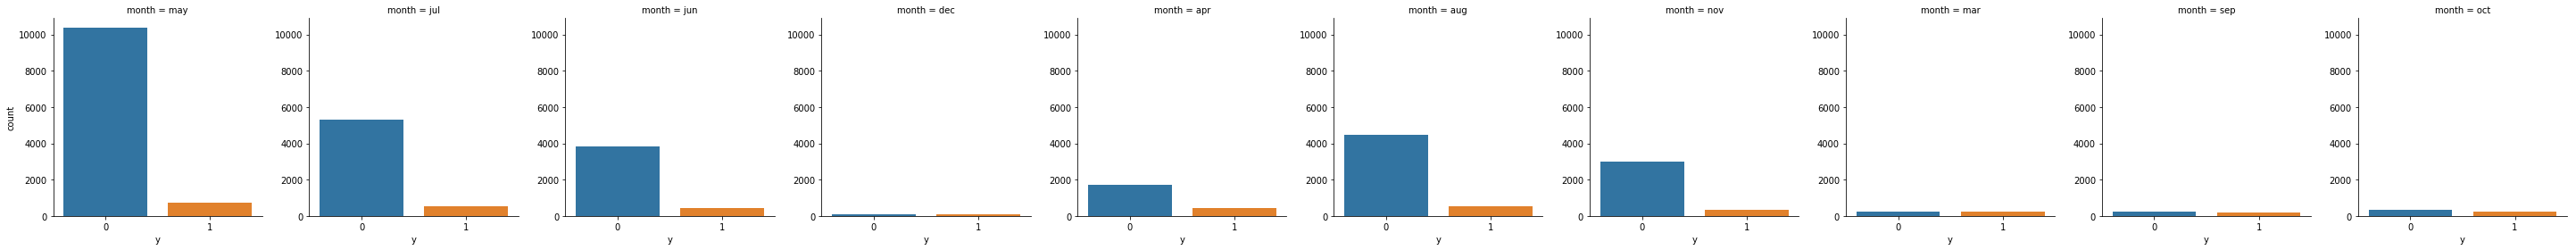

In [49]:
sns.factorplot(x='y', col='month', kind='count', data=X_train_2_combined);

In [51]:
def change_month(df):
    label_encode(["month"],df)

In [52]:
categorical_features

Index([u'contact', u'day_of_week', u'default', u'education', u'housing',
       u'job', u'loan', u'marital', u'month', u'poutcome'],
      dtype='object')

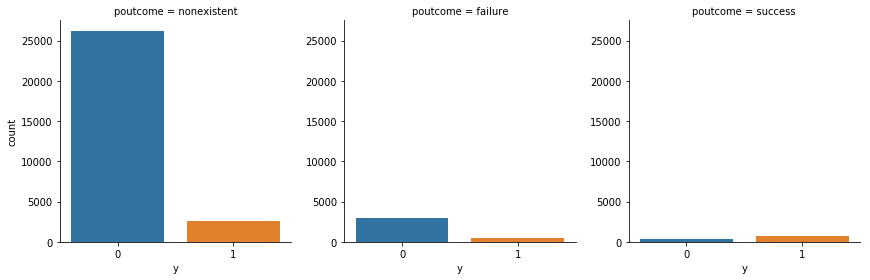

In [53]:
sns.factorplot(x='y', col='poutcome', kind='count', data=X_train_2_combined);

In [57]:
def change_duration(df):
    df.drop("duration", axis=1, inplace=True)

In [54]:
def change_poutcome(df):
    df.drop("poutcome", axis=1, inplace=True)

In [58]:
def preprocess(df):
    change_contact(df)
    change_day_of_week(df)
    change_default(df)
    change_education(df)
    change_housing(df)
    change_job(df)
    change_loan(df)
    change_married(df)
    change_month(df)
    change_poutcome(df)
    change_duration(df)

In [59]:
preprocess(X_train_2)

/Users/acko068/greyatom/miniconda2/envs/greyatom/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/acko068/greyatom/miniconda2/envs/greyatom/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/acko068/greyatom/miniconda2/envs/greyatom/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documenta

In [60]:
rf = RandomForestClassifier()
rf.fit(X_train_2, y_train_2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [61]:
rf.feature_importances_

array([  2.15858348e-01,   8.85020455e-02,   4.14761479e-02,
         7.09111651e-02,   1.99708922e-02,   9.02819846e-02,
         4.37593395e-02,   3.05110006e-02,   1.57217815e-02,
         2.00713989e-02,   3.78690388e-02,   1.54152679e-01,
         9.57150987e-02,   1.62318989e-02,   1.13501012e-07,
         3.47347319e-02,   2.42323349e-02])

In [62]:
temp = pd.DataFrame(rf.feature_importances_, index=X_train_2.columns)

In [67]:
temp[0].sort_values(ascending=False)

age                 2.158583e-01
euribor3m           1.541527e-01
nr.employed         9.571510e-02
campaign            9.028198e-02
job                 8.850205e-02
education           7.091117e-02
pdays               4.375934e-02
marital             4.147615e-02
cons.conf.idx       3.786904e-02
has_housing_loan    3.473473e-02
previous            3.051100e-02
has_loan            2.423233e-02
cons.price.idx      2.007140e-02
month               1.997089e-02
has_cell            1.623190e-02
emp.var.rate        1.572178e-02
has_default         1.135010e-07
Name: 0, dtype: float64

In [69]:
preprocess(X_test_2)

/Users/acko068/greyatom/miniconda2/envs/greyatom/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/acko068/greyatom/miniconda2/envs/greyatom/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/acko068/greyatom/miniconda2/envs/greyatom/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documenta

array([[ 1.   ,  0.   ],
       [ 1.   ,  0.   ],
       [ 0.925,  0.075],
       ..., 
       [ 0.9  ,  0.1  ],
       [ 1.   ,  0.   ],
       [ 0.7  ,  0.3  ]])

In [70]:
y_pred = rf.predict_proba(X_test_2)[:,1]

In [71]:
metrics.roc_auc_score(y_test_2, y_pred)

0.72778454600830977

In [72]:
y_pred1 = rf.predict(X_test_2)

In [73]:
metrics.recall_score(y_test_2, y_pred1)

0.23308270676691728

In [74]:
sm = SMOTE(random_state=12)
x_train_res, y_train_res = sm.fit_sample(X_train_2, y_train_2)

In [75]:
test_smote = pd.DataFrame(x_train_res, columns = X_test_2.columns.values)
test_y = pd.Series(y_train_res)

In [87]:
rf1 = DecisionTreeClassifier(max_depth=3)
rf1.fit(test_smote, test_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [88]:
y_pred = rf1.predict_proba(X_test_2)[:,1]

In [89]:
metrics.roc_auc_score(y_test_2, y_pred)

0.7506405827143432

In [90]:
y_pred1 = rf.predict(X_test_2)

In [91]:
metrics.recall_score(y_test_2, y_pred1)

0.23308270676691728

In [ ]:
def preprocess_continuos()